In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from hyperopt import hp, fmin, tpe, Trials
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_regression

In [3]:
df2 = pd.read_csv('harddrive.csv')
print(df2.shape)


(3179295, 95)


In [4]:
df2.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
#Identifying failes hdds
failed_hdds = df2.loc[df2.failure==1]["serial_number"]
len(failed_hdds)

215

In [216]:
#Filtering the data to only include failed hdds 
df = df2.loc[df2["serial_number"].isin(failed_hdds)]
healthy_df = df2.loc[~df2["serial_number"].isin(failed_hdds)]
print(healthy_df.shape)
print(df.shape)



(3173805, 95)
(5490, 95)


In [217]:
healthy_df = healthy_df[:20000]
healthy_df['date_diff'] = np.random.randint(300, 501, size=len(healthy_df))
display(healthy_df)




,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,date_diff
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20065,2016-01-01,Z305APH8,ST4000DM000,1.976651e-311,0,114,75803032,NaN,NaN,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388
20066,2016-01-01,MK0301YHGG2GHA,Hitachi HDS723030ALA640,1.482490e-311,0,100,0,133.0,90.0,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456
20067,2016-01-01,Z304JHVD,ST4000DM000,1.976651e-311,0,117,125688608,NaN,NaN,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,459
20068,2016-01-01,Z304JBW7,ST4000DM000,1.976651e-311,0,113,53779752,NaN,NaN,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486


In [218]:
df["end_date"] = df.groupby("serial_number")["date"].transform("max")
df["end_date"] = pd.to_datetime(df["end_date"])
df["date"] = pd.to_datetime(df["date"])
df["date_diff"] = df["end_date"] - df["date"]
df["date_diff"] = df["date_diff"].dt.days

df["date_diff"].describe()


C:\Users\Ruvenesh\AppData\Local\Temp\ipykernel_30464\783314547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["end_date"] = df.groupby("serial_number")["date"].transform("max")
C:\Users\Ruvenesh\AppData\Local\Temp\ipykernel_30464\783314547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["end_date"] = pd.to_datetime(df["end_date"])
C:\Users\Ruvenesh\AppData\Local\Temp\ipykernel_30464\783314547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

count    5490.000000
mean       49.387796
std        44.387053
min         0.000000
25%         7.000000
50%        21.000000
75%        95.000000
max       119.000000
Name: date_diff, dtype: float64

In [219]:
df = pd.concat([df, healthy_df], ignore_index=True)


In [220]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,end_date,date_diff
0,2016-01-01 00:00:00,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-17,16
1,2016-01-01 00:00:00,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,99
2,2016-01-01 00:00:00,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-18,108
3,2016-01-01 00:00:00,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,99
4,2016-01-01 00:00:00,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-10,9


In [221]:
df.isnull().sum()


date                        0
serial_number               0
model                       0
capacity_bytes              0
failure                     0
                        ...  
smart_254_raw           24878
smart_255_normalized    25490
smart_255_raw           25490
end_date                20000
date_diff                   0
Length: 97, dtype: int64

In [222]:
df_notna = df[df.columns[~(df.isna().sum().values/len(df) > 0.05)]]

In [223]:
df_notna.dropna(inplace=True)

C:\Users\Ruvenesh\AppData\Local\Temp\ipykernel_30464\748473798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notna.dropna(inplace=True)


In [224]:
df = df_notna.copy()
df.reset_index(inplace=True, drop=True)
df.isnull().sum()

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_188_raw           0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
smart_240_raw           0
smart_241_raw           0
smart_242_raw           0
date_diff               0
dtype: int64

In [225]:
df.head()
df.shape


(25029, 38)

In [226]:
df = df.drop(['date', 'serial_number', 'model'], axis=1)
df.head()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,date_diff
0,1.976651e-311,0,120,240872800,91,0,100,10,100,0,...,100,0,100,0,200,0,8.206430e-320,1.146406e-313,9.784107e-313,16
1,1.976651e-311,0,118,190147064,91,0,100,10,100,0,...,100,0,100,0,200,0,7.857538e-310,1.249659e-313,6.394443e-313,108
2,1.976651e-311,0,115,85258376,92,0,100,8,100,0,...,100,0,100,0,200,0,1.000186e-319,1.324438e-313,6.040397e-313,99
3,1.976651e-311,0,116,101976792,91,0,100,9,100,0,...,100,8,100,8,200,0,8.351192e-320,1.063035e-313,1.019657e-312,9
4,2.964974e-311,0,116,101694695,88,0,100,17,100,0,...,100,0,100,0,200,0,9.331476e-310,1.260229e-313,1.176377e-310,95


In [227]:
df = df.sample(frac=1).reset_index(drop=True)

In [228]:
# Features to keep, including specific SMART attributes and others
features = [
    'date', 
    'serial_number', 
    'model', 
    # 'capacity_bytes', 
    'date_diff',  # Non-SMART attributes
    'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw', 
    'smart_9_raw', 'smart_10_raw', 'smart_12_raw', 'smart_192_raw', 'smart_193_raw', 
    'smart_194_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw', 'smart_240_raw'  # SMART attributes to keep
]

# Dropping any feature not in the list above
dropping_features = [fname for fname in df.columns if fname not in features]
df.drop(dropping_features, inplace=True, axis=1)

# Display the first few rows of the filtered dataframe
df.tail()


,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,date_diff
25024,0,528,118,0,0.000000e+00,12804,0,118,239.0,239.0,20.0,0,0,0,0.000000e+00,378
25025,144270112,0,8,0,2.421136e-315,9538,0,8,0.0,3041.0,34.0,0,0,0,4.705975e-320,93
25026,40938304,0,11,0,1.604587e-315,17569,0,11,2.0,4267.0,23.0,0,0,0,1.389631e-309,307
25027,178957344,0,2,0,1.900696e-315,7880,0,2,0.0,42176.0,19.0,0,0,0,3.819622e-320,443
25028,91491304,0,2,0,1.596061e-315,7880,0,2,0.0,42915.0,19.0,0,0,0,3.820116e-320,334


In [229]:
Y = df["date_diff"]
X = df.drop(["date_diff"],axis=1)

Our target data is the date diff, meaning dates to failure 
Does this mean that if the model gets a data that is not supposed to fail it will give us a high date diff???

In [230]:
from sklearn.model_selection import train_test_split

# Assuming you have your features in X and target variable in y
# Replace this with your actual data

# Perform train-test split (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("Shapes - X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

Shapes - X_train: (20023, 15) X_test: (5006, 15) y_train: (20023,) y_test: (5006,)


In [231]:
X_test.to_csv('test_hdds.csv',index = False)

Random Forest MSE: 4119.1633248129165
Random Forest R^2 score: 0.8261353412016155
Model saved to 'model2.pkl'.
Model loaded from 'model2.pkl'.


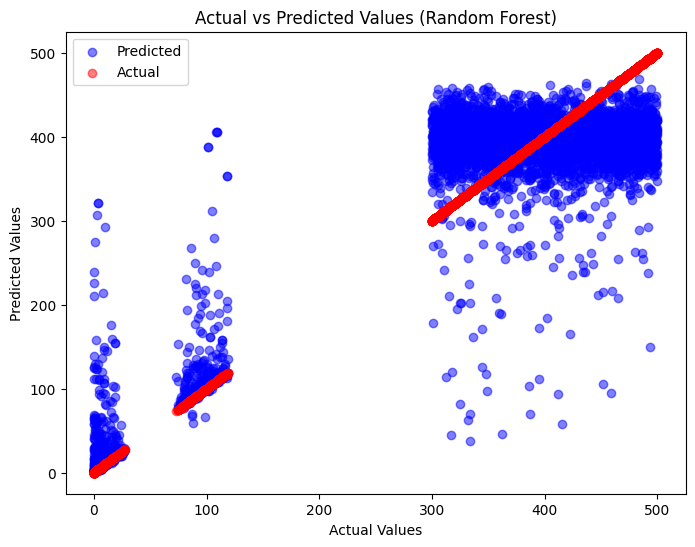

In [232]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

# Creating Random Forest Regressor
RF_model = RandomForestRegressor(random_state=1)
RF_model.fit(X_train, y_train)

# Predicting on test data
y_pred_RF = RF_model.predict(X_test)

# Calculating Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
print("Random Forest MSE:", mse_RF)

# Calculating R^2 score
score_RF = RF_model.score(X_test, y_test)
print("Random Forest R^2 score:", score_RF)

# Save the trained model to a file
joblib.dump(RF_model, 'model2.pkl')
print("Model saved to 'model2.pkl'.")

# Load the model from the file
loaded_model = joblib.load('model2.pkl')
print("Model loaded from 'model2.pkl'.")



# Visualizing Actual vs Predicted values with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RF, alpha=0.5, label='Predicted', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.show()